# Predicting Hospital Readmissions and Patient Outcomes 

The goal of this project is to analyze hospital readmissions and patient outcomes by 
combining two datasets
* Diabetes 130-US hospitals dataset(readmissions data).
* MIMIC-III Clinical Database (ICU data).
a).

# Task 1: Merging and Analyzing the Data

#### Importing important libraries at once

In [4]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mstats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

### Uploading the data sets

In [7]:
df_diabetes = pd.read_csv(r"diabetic_data.csv")
df_mimic = pd.read_csv(r"mimic_iii_data.csv")                            

* There are two data sets given in this project.
* They are uploaded using the following titles, df_diabetes and df_mimic respectively.

In [9]:
df_diabetes

,encounter_id,Patient_ID,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [10]:
df_mimic

,Patient_ID,ICU_Admission_ID,ICU_Length_of_Stay,Diagnoses,Blood_Glucose,Creatinine,Hemoglobin,WBC,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag
0,8222157,1001,14,Hypertension,146,0.781847,16.968111,4.593931,110,116,68,97,16,36.509798,NaN,9,1,0
1,55629189,1002,3,Stroke,174,3.188024,15.667593,7.431865,74,148,63,95,16,37.639906,Steroids,6,2,0
2,86047875,1003,4,Stroke,154,1.859621,13.871892,10.992984,96,171,72,87,17,37.377471,Insulin,7,4,0
3,82442376,1004,12,Sepsis,91,3.090111,14.341255,8.944880,78,123,84,91,12,39.114581,Steroids,13,4,1
4,42519267,1005,14,Pneumonia,92,1.030121,10.439457,9.796323,105,133,104,91,19,38.287349,Antibiotics,8,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,95619681,100996,6,Hypertension,144,3.005136,16.629977,8.205571,103,99,68,99,13,37.306897,Steroids,13,3,0
99996,24244983,100997,14,Heart Failure,134,1.511976,14.192766,6.054444,85,156,83,92,17,37.021202,Steroids,19,4,0
99997,21709845,100998,14,Diabetes,130,1.892404,16.083987,10.152384,99,163,91,93,13,36.018058,NaN,8,4,0
99998,94556493,100999,6,Hypertension,92,0.662018,16.852472,5.619990,97,119,62,91,14,36.426754,NaN,7,5,0


### We have combined both the files to create a single data frame for data cleaning.

In [12]:
merged_df1 = pd.merge(df_diabetes,df_mimic, on='Patient_ID', how='inner')

We will call the combined data as merged_df1 and all the further steps will be carried out this data frame.

In [14]:
merged_df1

,encounter_id,Patient_ID,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,110,116,68,97,16,36.509798,NaN,9,1,0
1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,85,160,61,92,15,39.599822,NaN,17,3,1
2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,74,148,63,95,16,37.639906,Steroids,6,2,0
3,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,61,128,75,87,21,39.013647,Insulin,19,3,0
4,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,96,171,72,87,17,37.377471,Insulin,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141320,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,63,129,115,88,21,36.704751,Antibiotics,13,2,0
141321,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,113,179,66,87,19,36.735811,Insulin,13,3,0
141322,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,64,145,108,99,15,39.231192,Antibiotics,10,2,0
141323,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,63,155,62,90,23,37.045120,Steroids,15,5,1


### Now we will begin the data cleaning by understanding the data set.

In [16]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141325 entries, 0 to 141324
Data columns (total 67 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              141325 non-null  int64  
 1   Patient_ID                141325 non-null  int64  
 2   race                      141325 non-null  object 
 3   gender                    141325 non-null  object 
 4   age                       141325 non-null  object 
 5   weight                    141325 non-null  object 
 6   admission_type_id         141325 non-null  int64  
 7   discharge_disposition_id  141325 non-null  int64  
 8   admission_source_id       141325 non-null  int64  
 9   time_in_hospital          141325 non-null  int64  
 10  payer_code                141325 non-null  object 
 11  medical_specialty         141325 non-null  object 
 12  num_lab_procedures        141325 non-null  int64  
 13  num_procedures            141325 non-null  i

## Handling missing values

### checking the null values

In [19]:
print(merged_df1.isnull().sum())

encounter_id                 0
Patient_ID                   0
race                         0
gender                       0
age                          0
                         ...  
Temperature                  0
Medications              35300
Number_of_Lab_Tests          0
Number_of_Medications        0
Readmission_Flag             0
Length: 67, dtype: int64


In [20]:
merged_df1

,encounter_id,Patient_ID,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,110,116,68,97,16,36.509798,NaN,9,1,0
1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,85,160,61,92,15,39.599822,NaN,17,3,1
2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,74,148,63,95,16,37.639906,Steroids,6,2,0
3,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,61,128,75,87,21,39.013647,Insulin,19,3,0
4,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,96,171,72,87,17,37.377471,Insulin,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141320,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,63,129,115,88,21,36.704751,Antibiotics,13,2,0
141321,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,113,179,66,87,19,36.735811,Insulin,13,3,0
141322,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,64,145,108,99,15,39.231192,Antibiotics,10,2,0
141323,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,63,155,62,90,23,37.045120,Steroids,15,5,1


### I can see '?' in the weight column. Therefore checking the weight column

In [22]:
merged_df1['weight'].value_counts()

weight
?            136646
[75-100)       1966
[50-75)        1330
[100-125)       877
[125-150)       210
[25-50)         146
[0-25)           86
[150-175)        46
[175-200)        14
>200              4
Name: count, dtype: int64

* The weight column has more irrelevant values. This will interfere in the analysis. Also, we do not need weight for our analysis. So moving further by dropping the weight column.

In [24]:
merged_df1.drop(['weight'], axis=1, inplace=True)

* Checking for further missing values

In [26]:
print(merged_df1.isnull().sum())

encounter_id                 0
Patient_ID                   0
race                         0
gender                       0
age                          0
                         ...  
Temperature                  0
Medications              35300
Number_of_Lab_Tests          0
Number_of_Medications        0
Readmission_Flag             0
Length: 66, dtype: int64


In [27]:
print(merged_df1.isnull())

        encounter_id  Patient_ID   race  gender    age  admission_type_id  \
0              False       False  False   False  False              False   
1              False       False  False   False  False              False   
2              False       False  False   False  False              False   
3              False       False  False   False  False              False   
4              False       False  False   False  False              False   
...              ...         ...    ...     ...    ...                ...   
141320         False       False  False   False  False              False   
141321         False       False  False   False  False              False   
141322         False       False  False   False  False              False   
141323         False       False  False   False  False              False   
141324         False       False  False   False  False              False   

        discharge_disposition_id  admission_source_id  time_in_hospital  \


In [28]:
null_values= merged_df1.isnull().sum()

null_values.info()


<class 'pandas.core.series.Series'>
Index: 66 entries, encounter_id to Readmission_Flag
Series name: None
Non-Null Count  Dtype
--------------  -----
66 non-null     int64
dtypes: int64(1)
memory usage: 3.1+ KB


In [29]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [30]:
import missingno as msno

<Axes: >

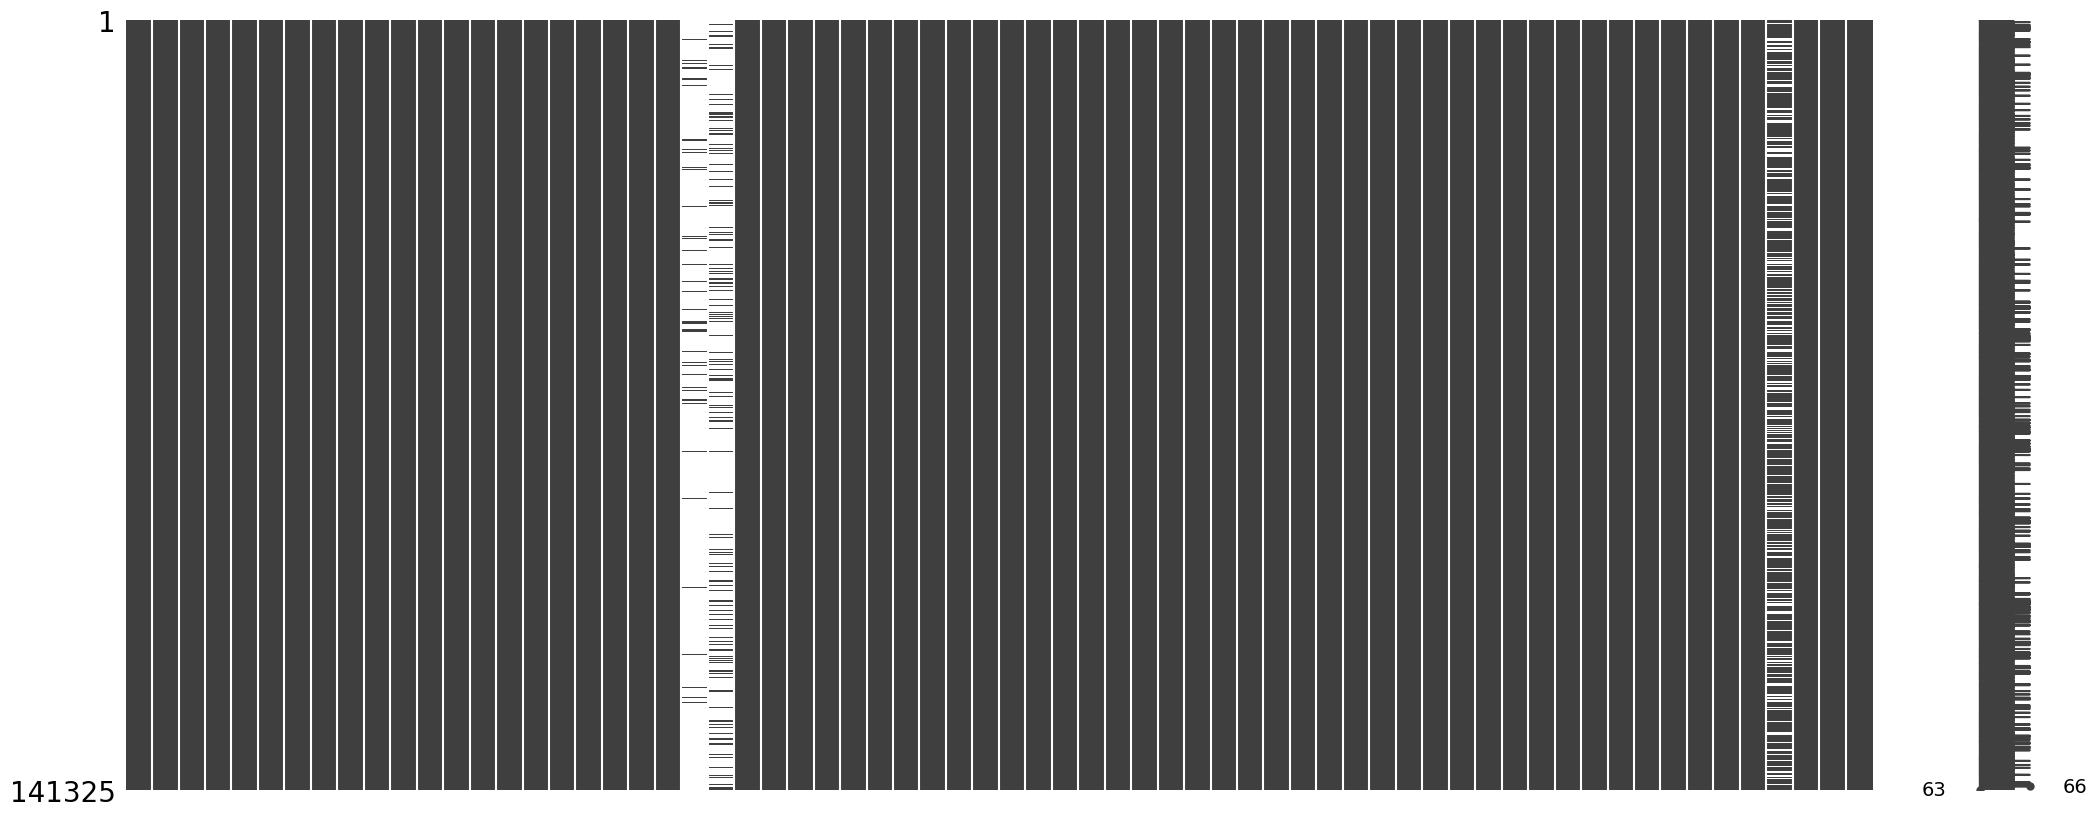

In [31]:
msno.matrix(merged_df1)

In [32]:
demographics = ['age', 'gender', 'race']
clinical_features = [
    'ICU_Length_of_Stay', 'num_lab_procedures', 'num_medications', 'number_diagnoses', 
    'Blood_Glucose', 'Readmission_Flag'
]

## Descriptive Stats

In [34]:
print(merged_df1[demographics + clinical_features].describe())

       ICU_Length_of_Stay  num_lab_procedures  num_medications  \
count       141325.000000       141325.000000    141325.000000   
mean             8.478358           43.432125        15.847508   
std              3.458078           19.338792         8.134384   
min              3.000000            1.000000         1.000000   
25%              5.000000           32.000000        10.000000   
50%              8.000000           44.000000        15.000000   
75%             11.000000           57.000000        20.000000   
max             14.000000          132.000000        81.000000   

       number_diagnoses  Blood_Glucose  Readmission_Flag  
count     141325.000000  141325.000000     141325.000000  
mean           7.240658     134.324012          0.299296  
std            1.983705      37.549941          0.457951  
min            1.000000      70.000000          0.000000  
25%            6.000000     102.000000          0.000000  
50%            8.000000     134.000000          0.0

## Exploratory Analysis and Data Visualization 

### Univariate visualization

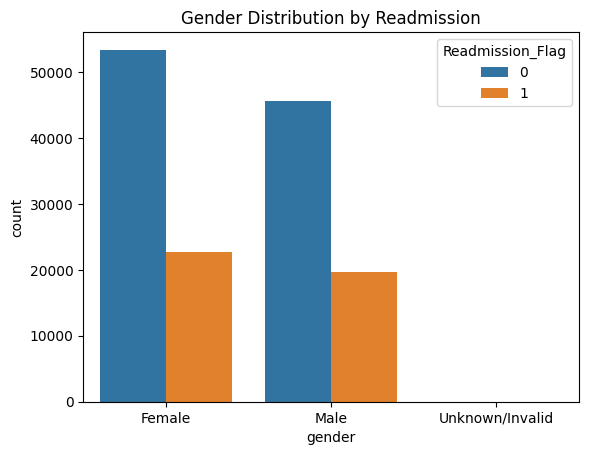

In [37]:
sns.countplot(data=merged_df1, x='gender', hue='Readmission_Flag')
plt.title('Gender Distribution by Readmission')
plt.show()

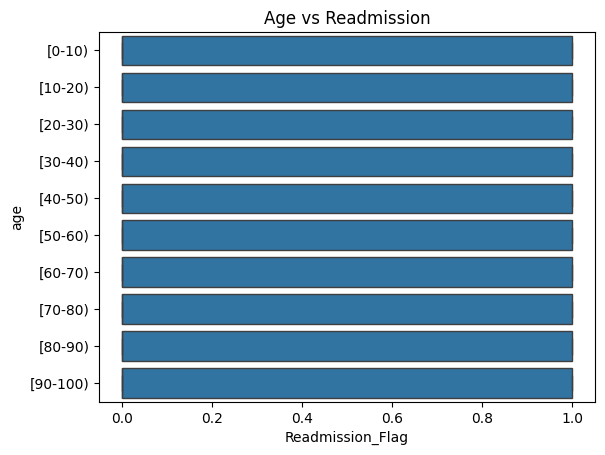

In [38]:
sns.boxplot(data=merged_df1, x='Readmission_Flag', y='age')
plt.title('Age vs Readmission')
plt.show()

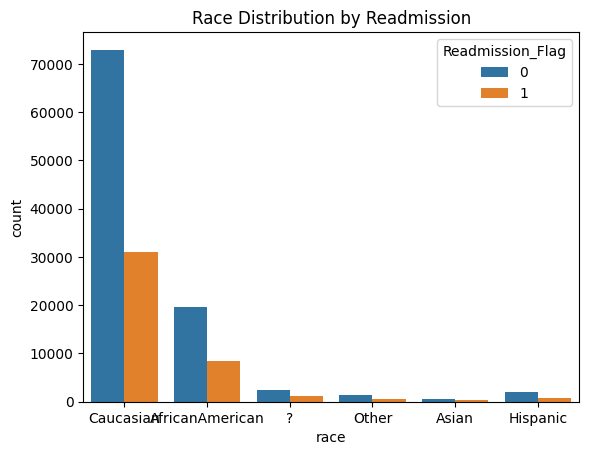

In [39]:
sns.countplot(data=merged_df1, x='race', hue='Readmission_Flag')
plt.title('Race Distribution by Readmission')
plt.show()

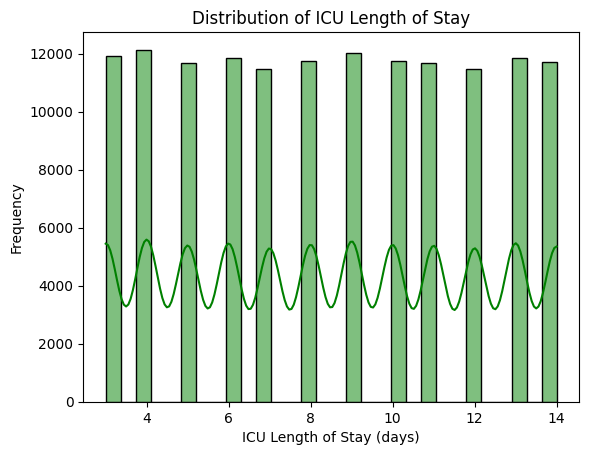

In [40]:
sns.histplot(data=merged_df1, x='ICU_Length_of_Stay', kde=True, bins=30, color='green')
plt.title('Distribution of ICU Length of Stay')
plt.xlabel('ICU Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()


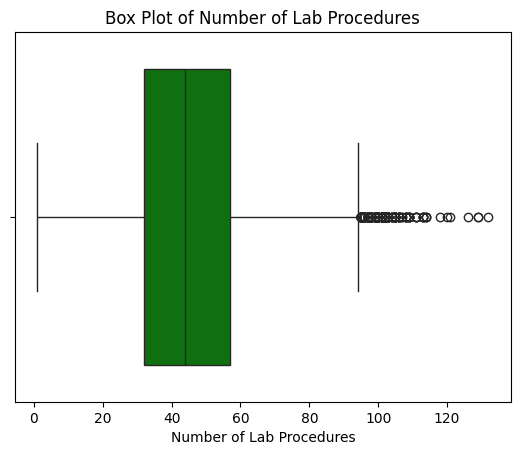

In [41]:
sns.boxplot(data=merged_df1, x='num_lab_procedures', color='green')
plt.title('Box Plot of Number of Lab Procedures')
plt.xlabel('Number of Lab Procedures')
plt.show()


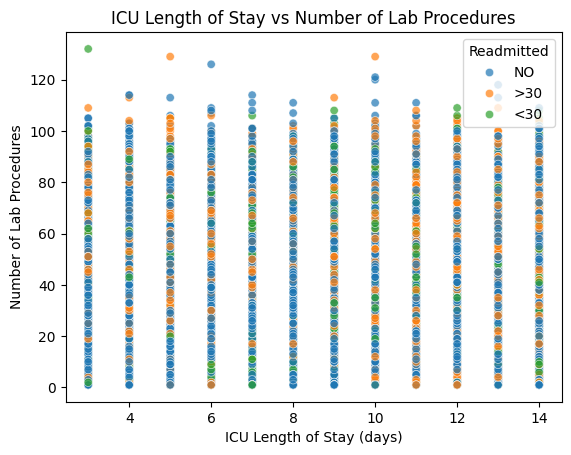

In [42]:
sns.scatterplot(data=merged_df1, x='ICU_Length_of_Stay', y='num_lab_procedures', hue='readmitted', alpha=0.7)
plt.title('ICU Length of Stay vs Number of Lab Procedures')
plt.xlabel('ICU Length of Stay (days)')
plt.ylabel('Number of Lab Procedures')
plt.legend(title='Readmitted')
plt.show()


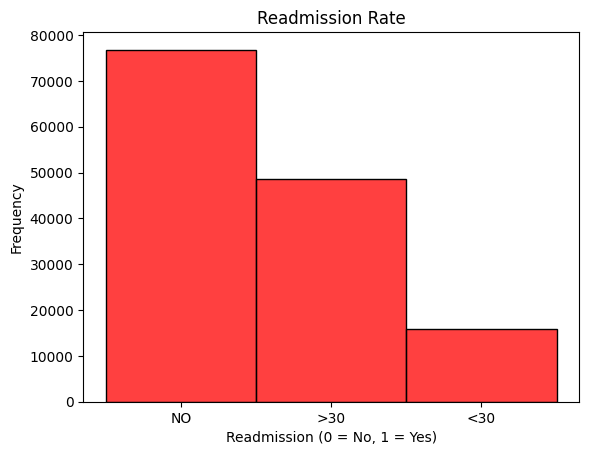

In [43]:
sns.histplot(data=merged_df1, x='readmitted', kde=False, color='red')
plt.title('Readmission Rate')
plt.xlabel('Readmission (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()

# Task 2: Investigating Patterns and Relationships 
## Exploring Variable Relationships: 

To understand the varaible I had to read the current status of the data

In [46]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141325 entries, 0 to 141324
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              141325 non-null  int64  
 1   Patient_ID                141325 non-null  int64  
 2   race                      141325 non-null  object 
 3   gender                    141325 non-null  object 
 4   age                       141325 non-null  object 
 5   admission_type_id         141325 non-null  int64  
 6   discharge_disposition_id  141325 non-null  int64  
 7   admission_source_id       141325 non-null  int64  
 8   time_in_hospital          141325 non-null  int64  
 9   payer_code                141325 non-null  object 
 10  medical_specialty         141325 non-null  object 
 11  num_lab_procedures        141325 non-null  int64  
 12  num_procedures            141325 non-null  int64  
 13  num_medications           141325 non-null  i

As I see there are 22 columns that contain individual drug administration data. We do not need these columns in our analysis.

In [48]:
# Therefore, removing the irrelevant columns with drugs data to make the data frame more simple

In [49]:
merged_df1.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton','glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'], axis=1, inplace=True)
merged_df1

,encounter_id,Patient_ID,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,?,...,110,116,68,97,16,36.509798,NaN,9,1,0
1,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,?,...,85,160,61,92,15,39.599822,NaN,17,3,1
2,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,74,148,63,95,16,37.639906,Steroids,6,2,0
3,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,61,128,75,87,21,39.013647,Insulin,19,3,0
4,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,96,171,72,87,17,37.377471,Insulin,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141320,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,...,63,129,115,88,21,36.704751,Antibiotics,13,2,0
141321,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,...,113,179,66,87,19,36.735811,Insulin,13,3,0
141322,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,MC,...,64,145,108,99,15,39.231192,Antibiotics,10,2,0
141323,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,...,63,155,62,90,23,37.045120,Steroids,15,5,1


We can now see that the data set have become more cleaner. But then I can see that payer code also has '?'

#### Lets check for '?' symbol in other columns in detail

In [52]:
#Checking for '?' in the data set
for col in merged_df1.columns:
    if merged_df1[col].dtype == object:
         print(col,merged_df1[col][merged_df1[col] == '?'].count())

race 3467
gender 0
age 0
payer_code 69688
medical_specialty 63227
diag_1 30
diag_2 597
diag_3 2393
max_glu_serum 0
A1Cresult 0
insulin 0
change 0
diabetesMed 0
readmitted 0
Diagnoses 0
Medications 0


### The following columns has '?' symbol : weight, payer_code, medical_specialty

In [54]:
# Access a specific column
column_data = merged_df1["payer_code"]


In [55]:
# Print the column data
print(column_data)

0          ?
1          ?
2          ?
3          ?
4          ?
          ..
141320    MC
141321    MC
141322    MC
141323    MC
141324     ?
Name: payer_code, Length: 141325, dtype: object


#### The payer_code column also has irrelevant data. therefore, instead of replacing it, we will remove it from our data frame.

In [57]:
merged_df1.drop(['payer_code'], axis=1, inplace=True)

#### We have already removed the weight column from the data frame. However, we may need medical_specialty as a variable. Therefore we must replace it. 

In [59]:
# Replace values across the entire dataframe
merged_df1['medical_specialty'] = merged_df1['medical_specialty'].replace("?", np.nan)

Incase of missing data in a particular column, we can replace it with 'unknown' (healthcare domain specific)

In [61]:
# Impute missing categorical values
categorical_cols = ['race', 'gender', 'Medications', 'medical_specialty']
for col in categorical_cols:
    merged_df1[col] = merged_df1[col].fillna('Unknown')

In [62]:
# Normalize numerical features
numerical_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                  'number_inpatient', 'number_outpatient', 'number_emergency', 'number_diagnoses']
scaler = MinMaxScaler()
merged_df1[numerical_cols] = scaler.fit_transform(merged_df1[numerical_cols])

In [63]:
# Impute missing numerical values
for col in numerical_cols:
    merged_df1[col] = merged_df1[col].fillna(merged_df1[col].median())

In [64]:
merged_df1

,encounter_id,Patient_ID,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,0.000000,Pediatrics-Endocrinology,...,110,116,68,97,16,36.509798,Unknown,9,1,0
1,2278392,8222157,Caucasian,Female,[0-10),6,25,1,0.000000,Pediatrics-Endocrinology,...,85,160,61,92,15,39.599822,Unknown,17,3,1
2,149190,55629189,Caucasian,Female,[10-20),1,1,7,0.153846,Unknown,...,74,148,63,95,16,37.639906,Steroids,6,2,0
3,149190,55629189,Caucasian,Female,[10-20),1,1,7,0.153846,Unknown,...,61,128,75,87,21,39.013647,Insulin,19,3,0
4,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,0.076923,Unknown,...,96,171,72,87,17,37.377471,Insulin,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141320,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,0.153846,Unknown,...,63,129,115,88,21,36.704751,Antibiotics,13,2,0
141321,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,0.307692,Unknown,...,113,179,66,87,19,36.735811,Insulin,13,3,0
141322,443854148,41088789,Caucasian,Male,[70-80),1,1,7,0.000000,Unknown,...,64,145,108,99,15,39.231192,Antibiotics,10,2,0
141323,443857166,31693671,Caucasian,Female,[80-90),2,3,7,0.692308,Surgery-General,...,63,155,62,90,23,37.045120,Steroids,15,5,1


## Explore potential differences in outcomes patient characteristics.

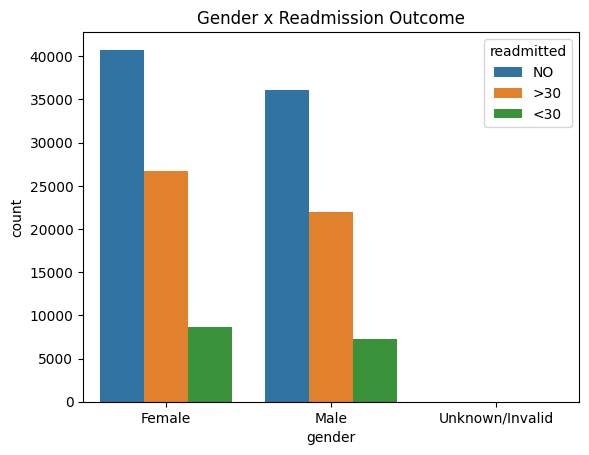

In [66]:
#Exploring readmission based on gender
sns.countplot(data=merged_df1, x='gender', hue='readmitted')
plt.title("Gender x Readmission Outcome")
plt.show()

#### Interpretation:
* The Readmissions seen in Female more than Male

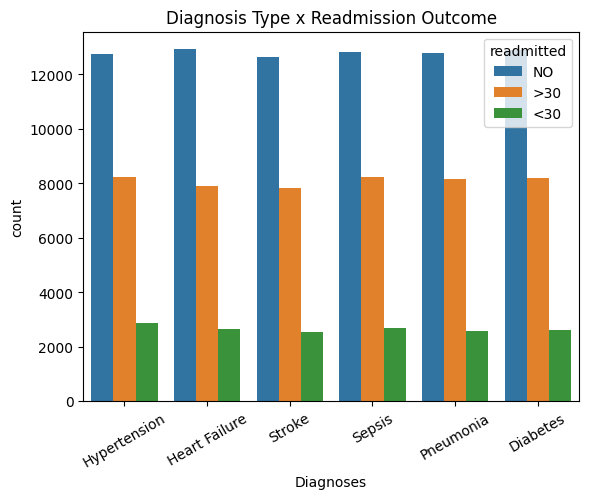

In [68]:
#Exploring readmission based on type of diagnosis
sns.countplot(data=merged_df1, x='Diagnoses', hue='readmitted')
plt.xticks(rotation=30)
plt.title("Diagnosis Type x Readmission Outcome")
plt.show()


#### Interpretation:
* Total number of Type of Diagnosis seen in the overall admissions - 6
* Type of diagnosis are - Hypertension, Heart failure, Stroke, Sepsis, Pneumonia, Diabetes

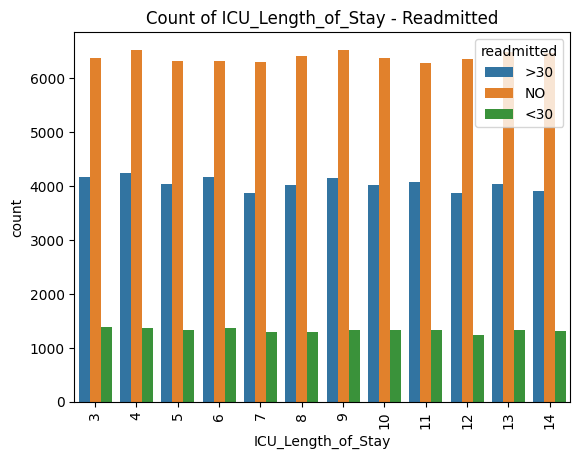

In [70]:
sns.countplot(x='ICU_Length_of_Stay', hue= "readmitted", data = merged_df1)
plt.xticks(rotation=90)
plt.title("Count of ICU_Length_of_Stay - Readmitted")
plt.show()

#### Interpretation:
* 

## The distribution of clinical features  to identify trends

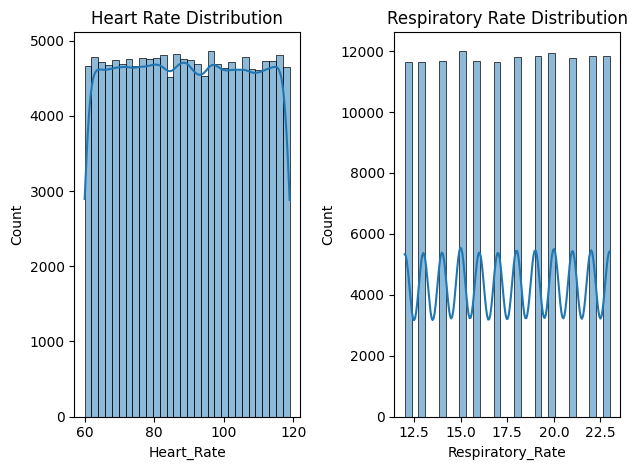

In [73]:
# Histogram for Heart Rate
plt.subplot(1, 2, 1)
sns.histplot(x=merged_df1['Heart_Rate'], bins=30, kde=True)
plt.title('Heart Rate Distribution')

# Histogram for Respiratory Rate
plt.subplot(1, 2, 2)
sns.histplot(x=merged_df1['Respiratory_Rate'], bins=30, kde=True)
plt.title('Respiratory Rate Distribution')

plt.tight_layout()
plt.show()

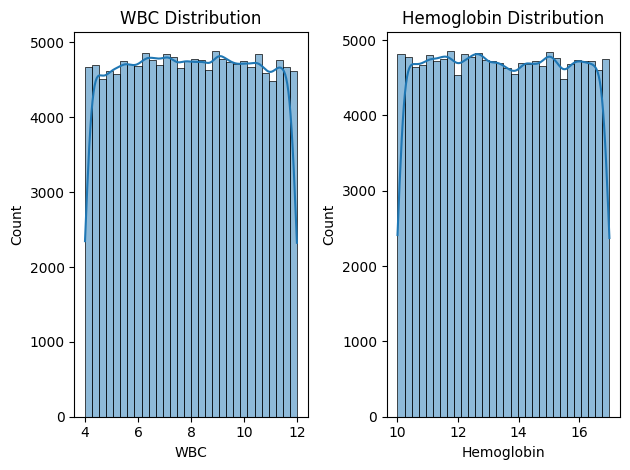

In [74]:
# Histogram for Hemoglobin
plt.subplot(1, 2, 2)
sns.histplot(x=merged_df1['Hemoglobin'], bins=30, kde=True)
plt.title('Hemoglobin Distribution')

# Histogram for WBC
plt.subplot(1, 2, 1)
sns.histplot(x=merged_df1['WBC'], bins=30, kde=True)
plt.title('WBC Distribution')

plt.tight_layout()
plt.show()

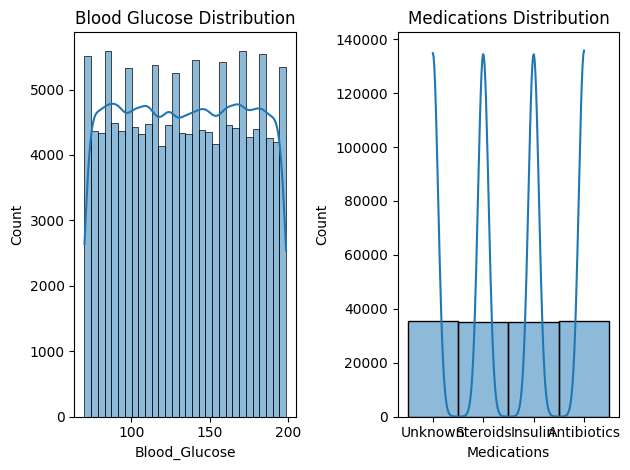

In [75]:
# Histogram for glucose levels
plt.subplot(1, 2, 1)
sns.histplot(x=merged_df1['Blood_Glucose'], bins=30, kde=True)
plt.title('Blood Glucose Distribution')

# Histogram for Medications
plt.subplot(1, 2, 2)
sns.histplot(x=merged_df1['Medications'], bins=30, kde=True)
plt.title('Medications Distribution')

plt.tight_layout()
plt.show()


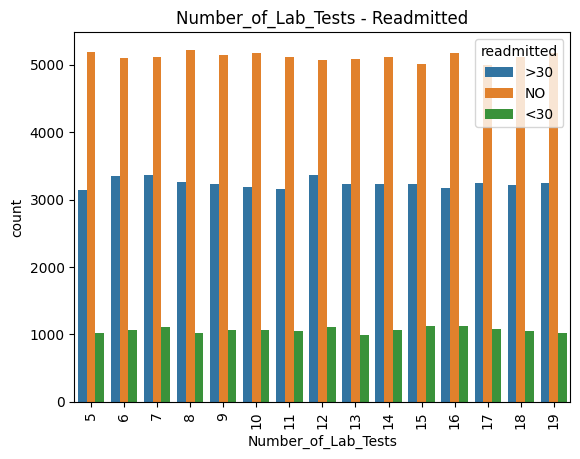

In [76]:
# Relation of Number of Lab tests to Readmission
sns.countplot(x='Number_of_Lab_Tests', hue= "readmitted", data = merged_df1)
plt.xticks(rotation=90)
plt.title("Number_of_Lab_Tests - Readmitted")
plt.show()

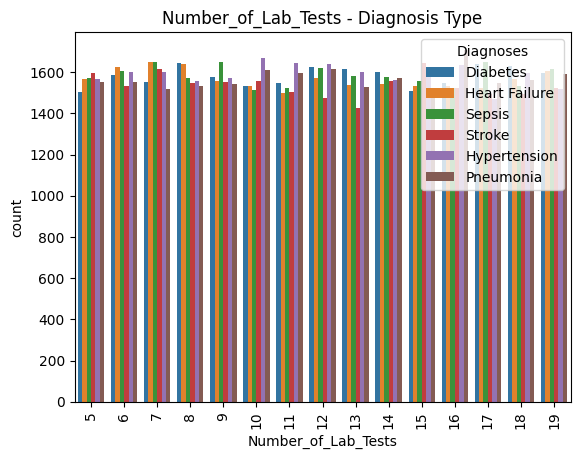

In [77]:
# Number of Lab test performed per Diagnosis
sns.countplot(x='Number_of_Lab_Tests', hue= "Diagnoses", data = merged_df1)
plt.xticks(rotation=90)
plt.title("Number_of_Lab_Tests - Diagnosis Type")
plt.show()

# Task 3: Predicting Patient Outcomes 
## Modeling the Data

In [79]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [80]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.4.2


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
# Encode categorical variables
encoded_df = pd.get_dummies(merged_df1, drop_first=True)

In [83]:
# Check for missing values
print(encoded_df.isnull().sum().sum())  # Should be 0

0


In [84]:
# Ensure all features are in the correct format
print(encoded_df.dtypes)

encounter_id                int64
Patient_ID                  int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
                            ...  
Diagnoses_Sepsis             bool
Diagnoses_Stroke             bool
Medications_Insulin          bool
Medications_Steroids         bool
Medications_Unknown          bool
Length: 2388, dtype: object


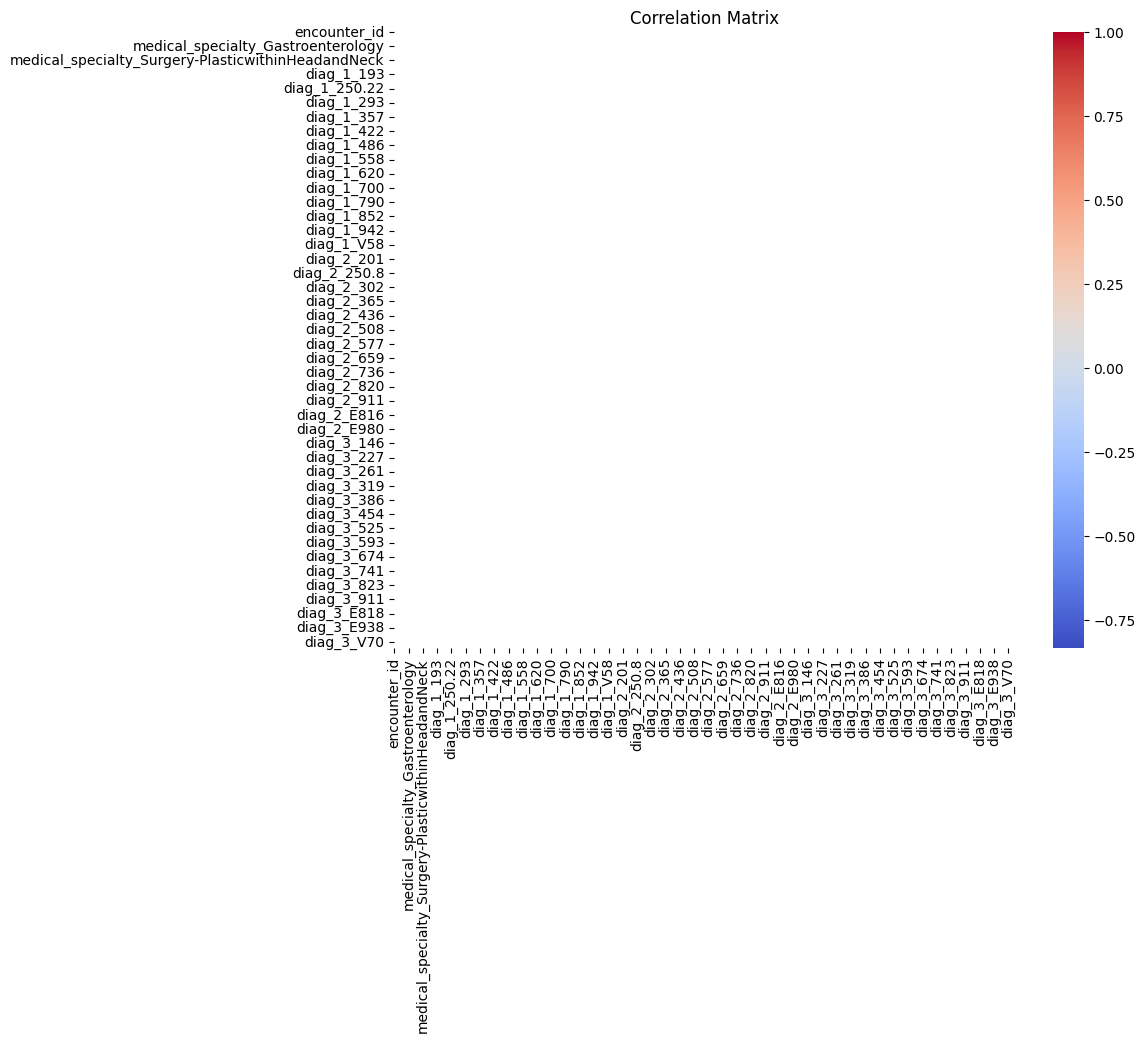

In [85]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_df.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [86]:
# Split data into training and testing sets
X = encoded_df.drop(['Readmission_Flag'], axis=1)
y = encoded_df['Readmission_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [88]:
# Evaluate model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.724252609234035
Confusion Matrix:
 [[19942     3]
 [ 7791   529]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84     19945
           1       0.99      0.06      0.12      8320

    accuracy                           0.72     28265
   macro avg       0.86      0.53      0.48     28265
weighted avg       0.80      0.72      0.63     28265



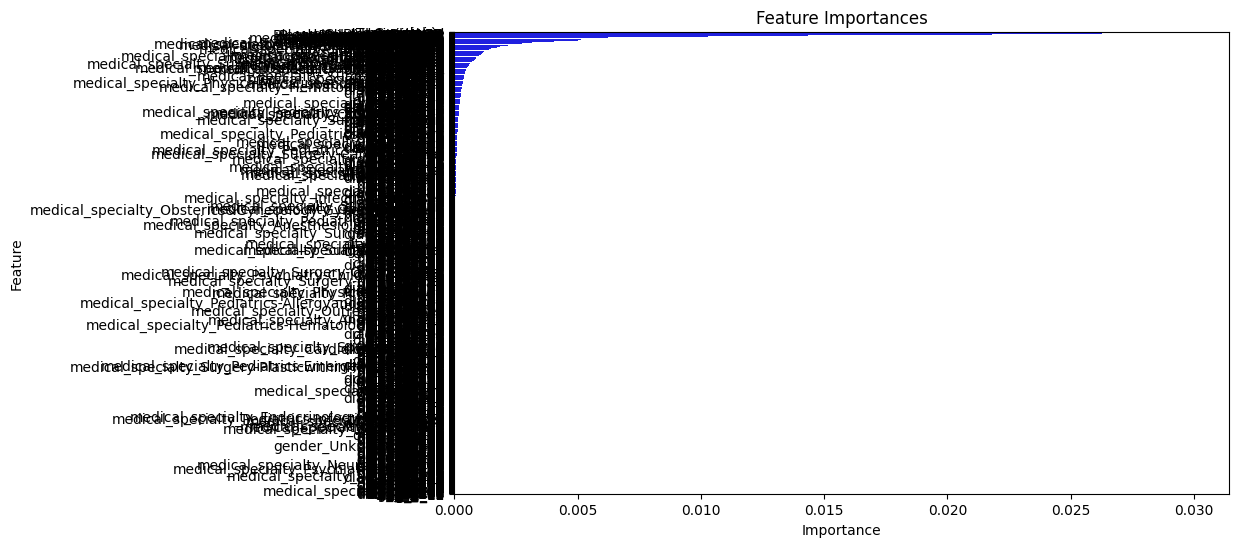

TypeError: 'NoneType' object is not callable

In [90]:
# Feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='blue')
plt.title('Feature Importances')
plt.show() ('Importances')
plt.show()

In [97]:
# Segment patients based on number of medications
segments = pd.cut(merged_df1['num_medications'], bins=3, labels=['Low', 'Medium', 'High'])
merged_df1['medication_segment'] = segments
segment_analysis = merged_df1.groupby('medication_segment')['Readmission_Flag'].mean()
print(segment_analysis)

medication_segment
Low       0.298933
Medium    0.303701
High      0.297059
Name: Readmission_Flag, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22672\1713974765.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = merged_df1.groupby('medication_segment')['Readmission_Flag'].mean()


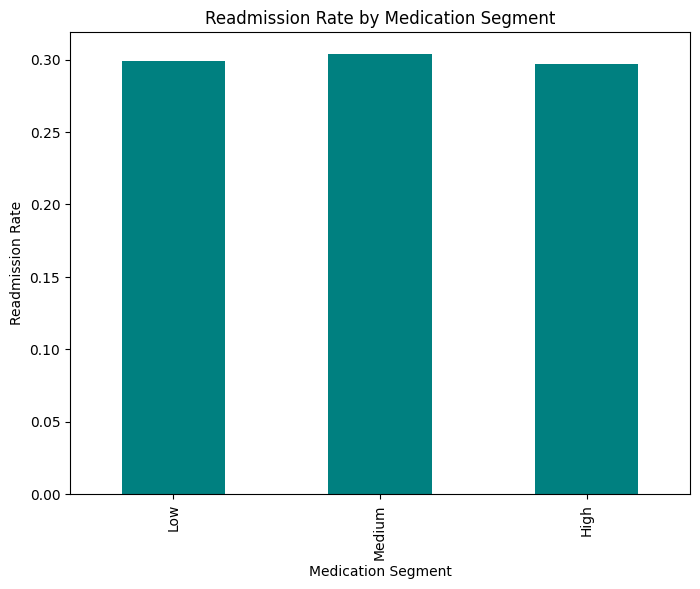

In [99]:
# Plot segment analysis
plt.figure(figsize=(8, 6))
segment_analysis.plot(kind='bar', color='teal')
plt.title('Readmission Rate by Medication Segment')
plt.xlabel('Medication Segment')
plt.ylabel('Readmission Rate')
plt.show()

# Task 4: Deployment : Deploying the Predictive Model (Flask Example)

In [101]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [102]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [103]:
import flask
import joblib

print("Flask version:", flask.__version__)
print("Joblib version:", joblib.__version__)

Flask version: 3.0.3
Joblib version: 1.4.2


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22672\2934532548.py:4: DeprecationWarning: The '__version__' attribute is deprecated and will be removed in Flask 3.1. Use feature detection or 'importlib.metadata.version("flask")' instead.
  print("Flask version:", flask.__version__)


In [120]:
from flask import Flask, request, jsonify
import joblib

app = Flask(mimic_iii_data and diabetic_data)

# Load the trained model
model = joblib.load('random_forest_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['features']])
    return jsonify({'prediction': int(prediction[0])})

if mimic_iii_data and diabetic_data== 'mimic_iii_data and diabetic_data':
    app.run(debug=True)


NameError: name 'mimic_iii_data' is not defined

In [106]:
pip install --upgrade pandas scikit-learn joblib Flask matplotlib seaborn

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.6/11.5 MB 19.5 MB/s eta 0:00:01
   -------- ------------------------------- 2.5/11.5 MB 32.2 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.5 MB 31.0 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.5 MB 30.4 MB/s eta 0:00:01
   ---------------------- ----------------- 6.6/11.5 MB 30.0 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.5 MB 29.7 MB/s eta 0:00:01
   -------------------------------- ------- 9.3/11.5 MB 29.7 MB/s eta 0:00:01
   ------------------------------------- -- 10.7/11.5 MB 31.2 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 28.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.1 MB 38.1 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/11.1 MB 33.3 MB/s eta 0:00:01
